In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure/heart.csv


## IMPORT MODULES

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score 
from sklearn.preprocessing import StandardScaler

## GETTING ABOUT DATASET

In [39]:
df = pd.read_csv('../input/heart-failure/heart.csv')

In [40]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.shape

(303, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## EXPLORATORY DATA ANALYSIS

>### GENDER DISTRIBUTION

In [72]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


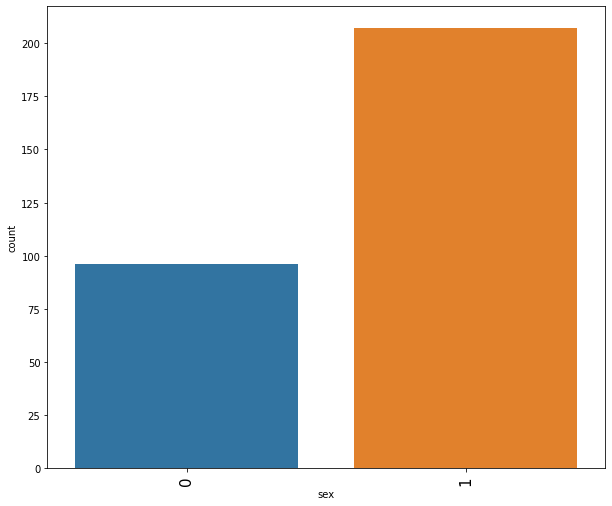

In [64]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['sex'])
plt.xticks(rotation='vertical',size=15)
plt.show()

In [73]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

>### TARGET VALUE DISTRIBUTION 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


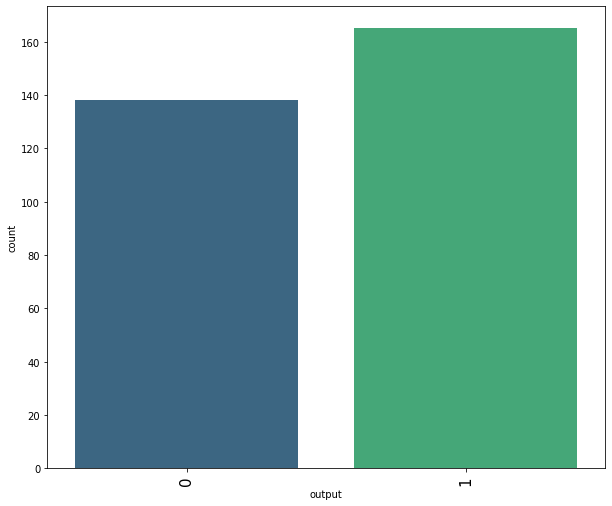

In [66]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['output'],palette='viridis')
plt.xticks(rotation='vertical',size=15)
plt.show()

>### CORRELATION BETWEEN EACH FEATURES

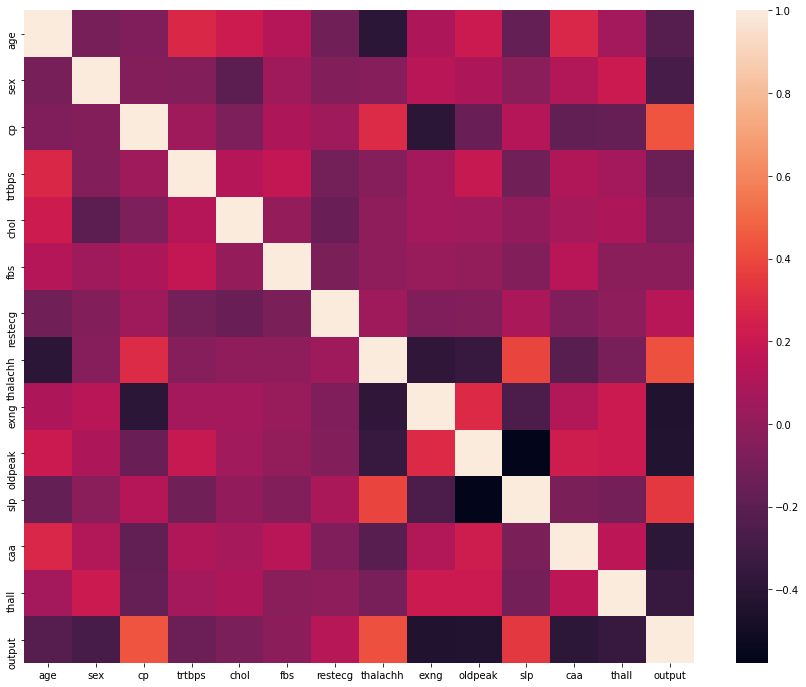

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())
plt.show()

## PRE PROCESSING

In [42]:
y = df['output']
x = df.drop(['output'],axis=1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## MODEL BUILDING

In [45]:
model= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1500, random_state=123)

In [47]:
prediction = model.predict(x_test)

In [48]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

In [49]:
df_predict.head(10)

,Actual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
9,1,1
119,1,1
223,0,0
268,0,0
33,1,0


## MODEL EVALUATION

>###  ACCURACY SCORE

In [68]:
acc = accuracy_score(y_test,prediction)

In [71]:
print("ACCURACY = ", str(round(acc*100,2))+"%")

ACCURACY =  85.25%


>### **MODEL HAS 85.25% ACCURACY**

>### CONFUSION MATRIX

In [52]:
confusion_matrix(y_test, prediction)

array([[25,  4],
       [ 5, 27]])

>### F1 SCORE, PERCISION SCORE, RECALL SCORE

In [60]:
print("Recall Score :",recall_score(y_test, prediction, average='weighted'))
print("Percision Score :",precision_score(y_test, prediction, average='weighted'))
print("F1 Score :",f1_score(y_test, prediction, average='weighted'))

Recall Score : 0.8524590163934426
Percision Score : 0.8530759739115107
F1 Score : 0.8525384035247887


>### Recall Score : 0.8524590163934426
>### Percision Score : 0.8530759739115107
>### F1 Score : 0.8525384035247887